<a href="https://colab.research.google.com/github/Confedracy/MNIST/blob/main/Copy_of_final_mnist_h5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
import tensorflow as tf




Loading Data

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()



11490434/11490434 [==============================] - 0s 0us/step


Normalization of the image to [0,1] range

In [ ]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255



Expand the dimensions of the images to (28, 28, 1)

In [ ]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)



Convertion of labels to one-hot encoding

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)



# Defining the model

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dropout(0.25))
model.add(Dense(128, activation='relu'))  # Added dense layer for better learning capacity
model.add(Dropout(0.5))  # Added another dropout layer
model.add(Dense(10, activation='softmax'))





Compilation

In [ ]:

model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])



In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint



Early Stopping and Model Checkpoint

In [ ]:
# EarlyStopping
es = EarlyStopping(monitor='val_accuracy', min_delta=0.01, patience=4, verbose=1)
mc = ModelCheckpoint('./Final_mnist.h5', monitor='val_accuracy', verbose=1, save_best_only=True)
cb = [es, mc]


# Model Training

Epoch 1/10
328/329 [============================>.] - ETA: 0s - loss: 0.3745 - accuracy: 0.8827
Epoch 1: val_accuracy improved from -inf to 0.97322, saving model to ./Final_mnist.h5
329/329 [==============================] - 48s 141ms/step - loss: 0.3743 - accuracy: 0.8827 - val_loss: 0.0876 - val_accuracy: 0.9732
Epoch 2/10
  1/329 [..............................] - ETA: 29s - loss: 0.0825 - accuracy: 0.9766

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


328/329 [============================>.] - ETA: 0s - loss: 0.1253 - accuracy: 0.9622
Epoch 2: val_accuracy improved from 0.97322 to 0.98022, saving model to ./Final_mnist.h5
329/329 [==============================] - 46s 141ms/step - loss: 0.1253 - accuracy: 0.9622 - val_loss: 0.0675 - val_accuracy: 0.9802
Epoch 3/10
328/329 [============================>.] - ETA: 0s - loss: 0.0932 - accuracy: 0.9715
Epoch 3: val_accuracy improved from 0.98022 to 0.98383, saving model to ./Final_mnist.h5
329/329 [==============================] - 42s 127ms/step - loss: 0.0932 - accuracy: 0.9715 - val_loss: 0.0545 - val_accuracy: 0.9838
Epoch 4/10
328/329 [============================>.] - ETA: 0s - loss: 0.0755 - accuracy: 0.9778
Epoch 4: val_accuracy improved from 0.98383 to 0.98667, saving model to ./Final_mnist.h5
329/329 [==============================] - 42s 126ms/step - loss: 0.0755 - accuracy: 0.9778 - val_loss: 0.0457 - val_accuracy: 0.9867
Epoch 5/10
328/329 [============================>.] - 

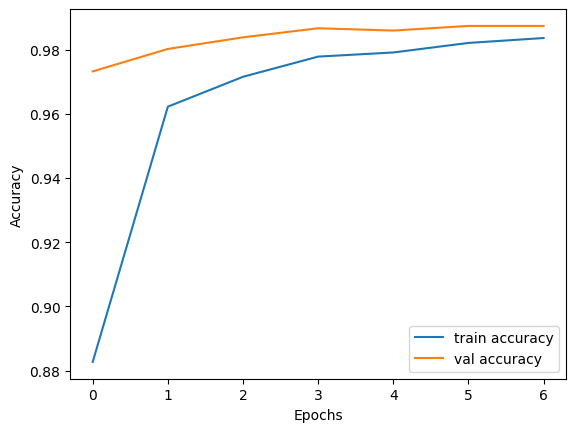

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.3, callbacks=cb)

# Save the model
model.save('Final_mnist.keras')

# Evaluate the model
score = model.evaluate(x_test, y_test)
print(f"The model accuracy is {score[1]}")

# Plot training history
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Prediction using Model

In [ ]:
from numpy import argmax
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.models import load_model



In [ ]:
# load and prepare the image
def load_image(filename):
	# load the image
	img = load_img(filename, grayscale=True, target_size=(28, 28))
	# convert to array
	img = img_to_array(img)
	# reshape into a single sample with 1 channel
	img = img.reshape(1, 28, 28, 1)
	# prepare pixel data
	img = img.astype('float32')
	img = img / 255.0
	return img



Class Prediction and result

In [ ]:
# load an image and predict the class
def run_example():
	# load the image
	img = load_image('paint_1.png')
	# load model
	model = load_model('Final_mnist.h5')
	# predict the class
	predict_value = model.predict(img)
	digit = argmax(predict_value)
	print(digit)

# entry point, run the example
run_example()

1/1 [==============================] - 0s 74ms/step
4
